In [1]:
from simple_rl import PPO
from simple_rl.ppo import plot
from simple_rl.common.evaluation import evaluate_policy

from stable_baselines3.common.vec_env import VecNormalize
from stable_baselines3.common.env_util import make_vec_env

In [2]:
env = VecNormalize(make_vec_env('Hopper-v4', n_envs=1, env_kwargs=dict(render_mode='rgb_array')))

model = PPO(env)
model.train(total_timesteps=1000000, verbose=1)

| 0.2% | policy   -0.91 | value   0.66 | entropy 4.22 | clip 0.07 | std [0.98 0.99 0.96] |
| 0.4% | policy   -0.16 | value   0.36 | entropy 4.13 | clip 0.19 | std [0.94 0.96 0.94] |
| 0.6% | policy   -0.27 | value   0.40 | entropy 4.04 | clip 0.19 | std [0.90 0.92 0.92] |
| 0.8% | policy   -0.28 | value   0.35 | entropy 3.95 | clip 0.11 | std [0.87 0.90 0.91] |
| 1.0% | policy   -0.27 | value   0.25 | entropy 3.90 | clip 0.13 | std [0.86 0.90 0.90] |
| 1.2% | policy   -0.18 | value   0.24 | entropy 3.86 | clip 0.13 | std [0.83 0.89 0.90] |
| 1.4% | policy   +0.01 | value   0.27 | entropy 3.85 | clip 0.14 | std [0.83 0.89 0.91] |
| 1.6% | policy   +0.01 | value   0.20 | entropy 3.86 | clip 0.17 | std [0.82 0.90 0.91] |
| 1.8% | policy   -0.09 | value   0.11 | entropy 3.83 | clip 0.10 | std [0.81 0.89 0.89] |
| 2.0% | policy   -0.06 | value   0.04 | entropy 3.81 | clip 0.10 | std [0.81 0.88 0.90] |
| 2.3% | policy   -0.01 | value   0.02 | entropy 3.81 | clip 0.12 | std [0.80 0.88 0.90] |

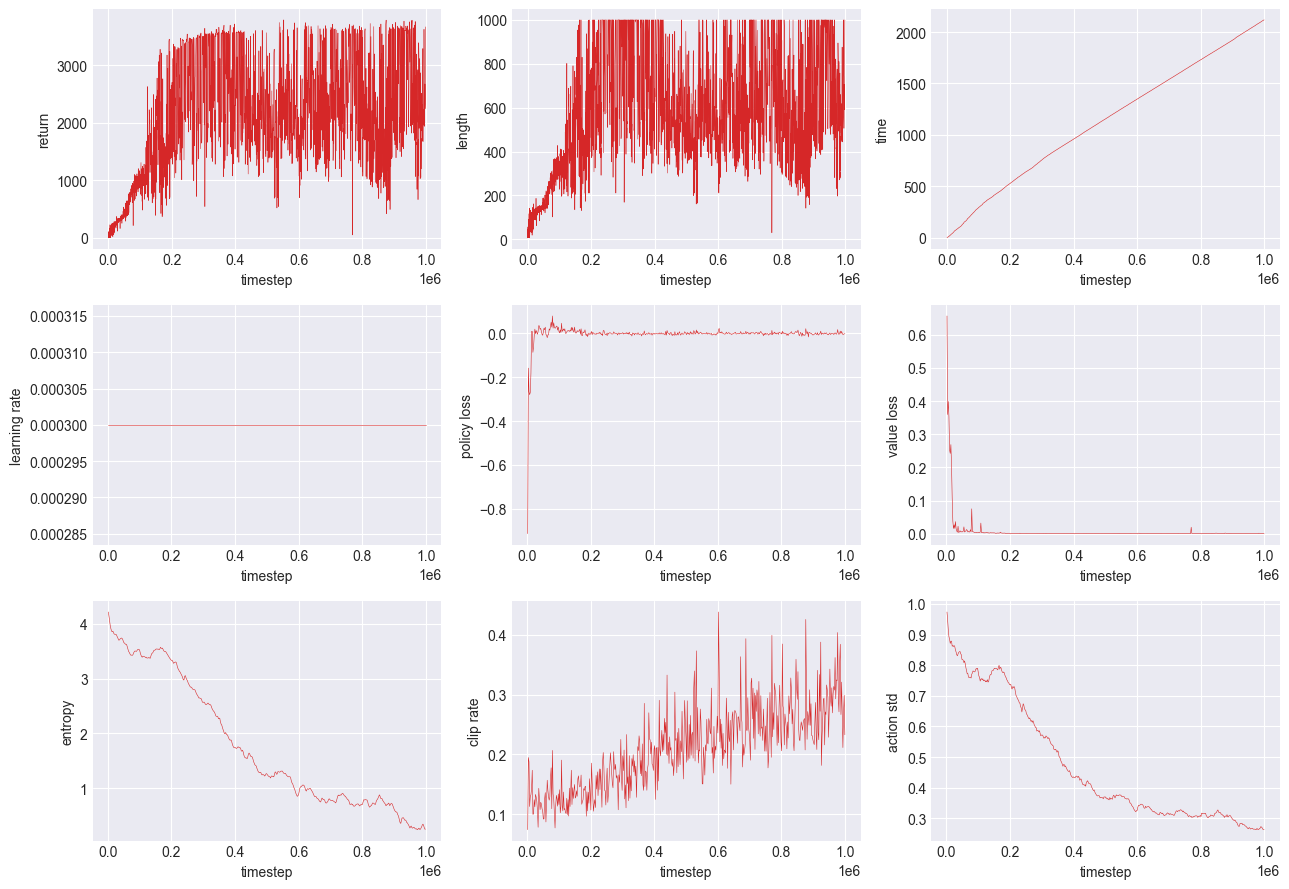

In [3]:
plot(model.logger)

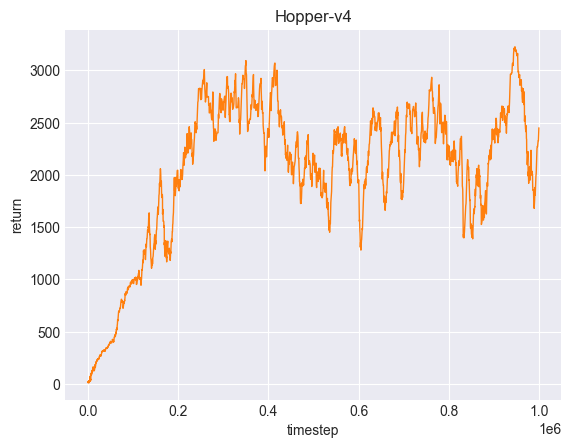

In [20]:
import matplotlib.pyplot as plt

x, y = model.logger.get('episode/r', window=16)

plt.style.use('seaborn-v0_8-darkgrid')
plt.plot(x, y, color='tab:orange', linewidth=1.0)
plt.title('Hopper-v4')
plt.xlabel('timestep')
plt.ylabel('return')
plt.show()

In [5]:
env.training = False
env.norm_reward = False

mean_d, std_d = evaluate_policy(
    model=model,
    env=env,
    n_eval_episodes=64,
    deterministic=True
)
mean_s, std_s = evaluate_policy(
    model=model,
    env=env,
    n_eval_episodes=64,
    deterministic=False
)

print('| deterministic policy | mean %6.1f | std: %5.1f |'%(mean_d, std_d))
print('| stochastic    policy | mean %6.1f | std: %5.1f |'%(mean_s, std_s))

| deterministic policy | mean 3285.6 | std: 529.6 |
| stochastic    policy | mean 2527.4 | std: 971.9 |


In [6]:
from stable_baselines3.common.vec_env import VecVideoRecorder

env = VecVideoRecorder(
    venv=env,
    video_folder='./videos/',
    record_video_trigger=lambda x: x==0,
    video_length=1000,
    name_prefix='Hopper-ppo'
)

evaluate_policy(
    model=model,
    env=env,
    n_eval_episodes=1,
    deterministic=True
)

env.close()

Saving video to c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\Hopper-ppo-step-0-to-step-1000.mp4
Moviepy - Building video c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\Hopper-ppo-step-0-to-step-1000.mp4.
Moviepy - Writing video c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\Hopper-ppo-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\gram15\workspace\projects\Simple-RL\examples\videos\Hopper-ppo-step-0-to-step-1000.mp4
